# 3rd development notebook 29Apr2020
Now that i have working Icpg functions I can start expanding my analysis

In [14]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq

import numpy as np
import matplotlib.pyplot as plt
#this script holds a set of useful functions I have built for this analysis
import cpg_functions

from random import choices
from collections import Counter

This is the salient points in the 2nd development notebook. It also provides some useful frequencies tables.

Percent GC for ref sequence: 0.38
I_CpG = 0.408
I*CpG = 0.407


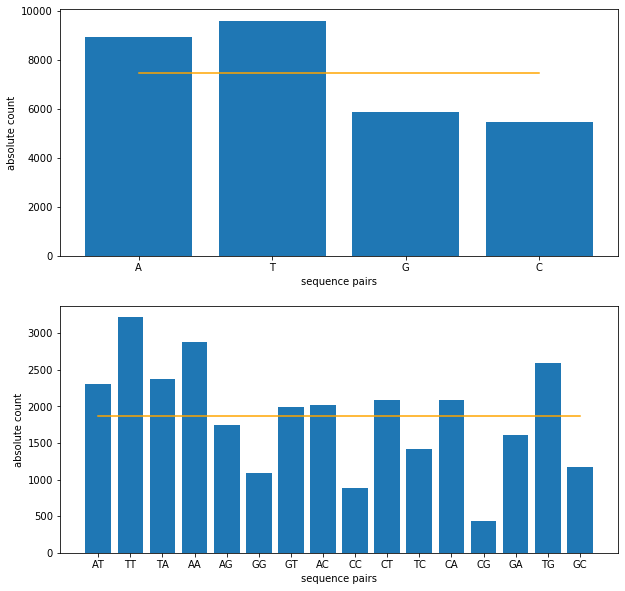

In [15]:
#get reference sequence
covid19Ref = SeqIO.read("/home/sp/Documents/coronavirus_cpg/CpG-in-covid/sequences/covid19ref.gb", "genbank")
covid_singles = cpg_functions.windowed_base_count(covid19Ref, k_window=1)
covid_doubles = cpg_functions.windowed_base_count(covid19Ref, k_window=2)
print('Percent GC for ref sequence: %.2f'%((covid_singles['C']+covid_singles['G'])/len(covid19Ref)))

p_CG = cpg_functions.calculate_icpg(covid_singles, covid_doubles)
p_sym_CG = cpg_functions.symmetrized_Icpg(covid_singles, covid_doubles)
print('I_CpG = %.3f\nI*CpG = %.3f'%(p_CG,p_sym_CG))

#plot this
fig, ax = plt.subplots(2, figsize=(10,10))

i = 0
for results in [covid_singles, covid_doubles]:
    x = list(results.keys())
    heights = list(results.values())
    ax[i].bar(x,heights)
    ax[i].set_xlabel('sequence pairs')
    ax[i].set_ylabel('absolute count')
    i += 1

#matplotlib does not like recieving hashes so need to replace with list()
ax[0].plot(list(covid_singles.keys()),[7475 for x in range(0,len(covid_singles.keys()))], 'orange')

#the E(x) for each doublet of bases is E(single_base)/4 since each doublet event is not independent of all other doublet events.
ax[1].plot(x,[7475/4 for x in range(0,len(covid_doubles.keys()))], 'orange')

plt.show()

# Mapping CpG sites and windowed frequency

## Broken horizontal bar graph to illustrate CpG site distribution

In [19]:
def find_string_indicies(search_string, sequence):
    '''
    This is a simple search loop to find the indicies for each      search_string in sequence
    '''
    if len(search_string) >= len(sequence):
        raise ValueError("search_string must be shorter length                             than sequence")
    i = len(sequence)
    results = []
    while True:
        i = sequence.rfind(search_string,0,i)
        if i == -1:
            break
        results.append(i)
    return sorted(results)

*This graph is for illustration only!* Because there are more x values (read: positions in the sequence) than rendered pixels not all vertical bars will show if they have a `width = 1`. Instead I have set the `width = 10` so that the viewer can get a feel for the distribution of the CpG sites.

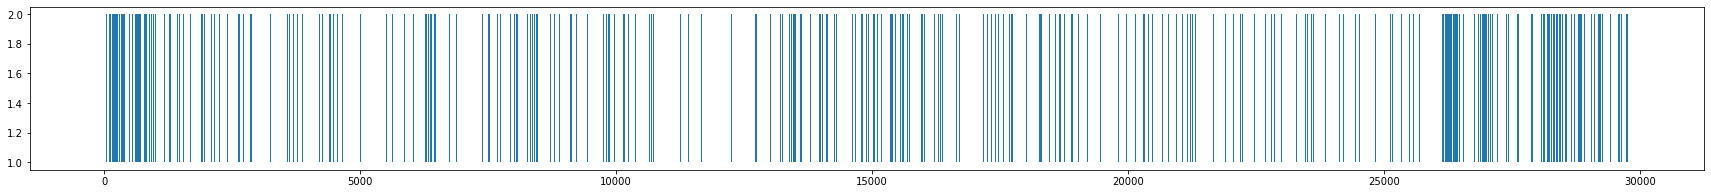

In [17]:
cp_indicies = find_string_indicies('CG', covid19Ref.seq)

barh_xvals = list(zip(cp_indicies,[15 for x in range(0,len(cp_indicies))]))

fig, ax = plt.subplots(figsize=(30,3))
ax.broken_barh(xranges=barh_xvals, yrange=(1,1))
plt.show()

## Windowed frequency of CpG sites
Examples of this can be found in multiple papers on CpG sites. Easy to implement in python.

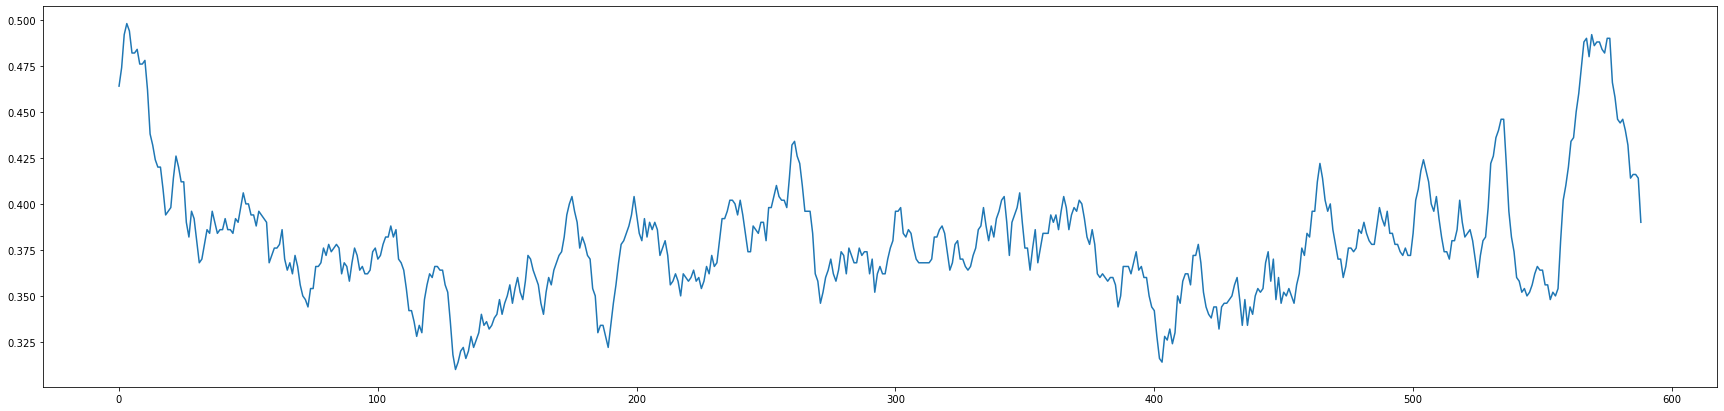

In [18]:
window = 500
cg_content_windowed = []
for i in range(0,len(covid19Ref),int(window/10)):
    sub_sequence = covid19Ref[i:i+window]
    base_counts = cpg_functions.windowed_base_count(sub_sequence)
    #this ends the function once the window starts sliding off the end of the sequence
    summed_counts = sum(base_counts.values())
    if summed_counts != window:
        break
    C = base_counts['C']/summed_counts
    G = base_counts['G']/summed_counts
    cg_content_windowed.append(C+G)
fig, ax = plt.subplots(figsize=(30,7))
ax.plot(cg_content_windowed)
plt.show()